In [1]:
from tdmclient import ClientAsync

from global_navigation import GlobalNavigation

client = ClientAsync()
node = await client.wait_for_node()
await node.lock()

ConnectionRefusedError: [Errno 111] Connection refused

In [1]:
from Vision import Vision, show_many_img
import time
from motion_control import MotionControl
from robot_api import Thymio
from global_navigation import GlobalNavigation
import numpy as np

In [2]:
#create vision module object
visio = Vision()
visio.begin()

Caméra initialisée sur le port 4


Detected markers: [4 0 1 5]
Detected 4 markers : [np.int32(4), np.int32(0), np.int32(1), np.int32(5)]
4 detected corners, 2 corners stored
4 detected corners, 2 corners stored
No crossing found before index 125.
no markers
(get_2_markers) Thymio and Goal markers not detected
Thymio not detected
Goal not detected
[Vision.camerafeed.run()] List of videofeeds must be 6, not 5.Defaulting to show all


Detected markers: [4 0 1 2 5]
Detected 5 markers : [np.int32(4), np.int32(0), np.int32(1), np.int32(2), np.int32(5)]
4 detected corners, 3 corners stored
4 detected corners, 3 corners stored
The highest index where the signal crosses -10 is 62.
no markers
(get_2_markers) Thymio and Goal markers not detected
Thymio not detected
Goal not detected
[Vision.camerafeed.run()] List of videofeeds must be 6, not 5.Defaulting to show all
Detected markers: [4 0 1 2 5]
Detected 5 markers : [np.int32(4), np.int32(0), np.int32(1), np.int32(2), np.int32(5)]
4 detected corners, 3 corners stored
4 detected corners, 3 corners stored
The highest index where the signal crosses -10 is 65.
no markers
(get_2_markers) Thymio and Goal markers not detected
Thymio not detected
Goal not detected
[Vision.camerafeed.run()] List of videofeeds must be 6, not 5.Defaulting to show all
Detected markers: [4 0 2 5]
Detected 4 markers : [np.int32(4), np.int32(0), np.int32(2), np.int32(5)]
4 detected corners, 3 corners stor

In [ ]:
#visio.stop() #stop the visio module

In [ ]:
#t, g, o = visio.get_thymio_goal_and_obstacles() #get the lists you need

In [ ]:
"""Point d'entrée principal"""
global_nav = GlobalNavigation()
#Thymio = Thymio(node, client)
motion_control = MotionControl(Thymio)


# # Get the initial value of our thymio，goal and obstacles
# thymio, goal, obstacles = camera_thread.get_thymio_goal_and_obstacles()
# thymio_x, thymio_y, theta = thymio
# start = (thymio_x, thymio_y)
# # Get the desired goal list from the vision module
# goal_list = global_navigation.dijkstra(start, goal, obstacles)
# # Delete the start point
# goal_list.pop(0)
# goal_point = goal_list[0]
# 
# try:
#     while True:
#         # Vous pouvez exécuter d'autres tâches en parallèle ici
#         # Le programme principal continue de tourner sans bloquer l'affichage
#         motion_control.obstacle_avoidance()
#         if motion_control.path_tracking(thymio, goal_point):
#             if goal_list:
#                 goal_list.pop(0)
#                 goal_point = goal_list[0]
#             else:
#                 break
#         thymio, goal, obstacles = camera_thread.get_thymio_goal_and_obstacles() 
#         print("Le programme principal fonctionne en arrière-plan...")
#         time.sleep(1)
# except KeyboardInterrupt:
#     print("Arrêt du programme demandé.")
# finally:
#     camera_thread.stop()
#     camera_thread.join()
#     print("Programme terminé.")

Detected markers: [4 2 5]
Detected 3 markers : [np.int32(4), np.int32(2), np.int32(5)]
4 detected corners, 4 corners stored
4 detected corners, 4 corners stored
The highest index where the signal crosses -10 is 69.
Detected markers: [4 5]
[Vision.camerafeed.run()] List of videofeeds must be 6, not 5.Defaulting to show all
Detected markers: [4 1 5]
Detected 3 markers : [np.int32(4), np.int32(1), np.int32(5)]
4 detected corners, 4 corners stored
4 detected corners, 4 corners stored
The highest index where the signal crosses -10 is 72.
Detected markers: [4 5]
[Vision.camerafeed.run()] List of videofeeds must be 6, not 5.Defaulting to show all


Detected markers: [4 2 5]
Detected 3 markers : [np.int32(4), np.int32(2), np.int32(5)]
4 detected corners, 4 corners stored
4 detected corners, 4 corners stored
The highest index where the signal crosses -10 is 67.
Detected markers: [4 5]
[Vision.camerafeed.run()] List of videofeeds must be 6, not 5.Defaulting to show all
Detected markers: [4 0 5]
Detected 3 markers : [np.int32(4), np.int32(0), np.int32(5)]
4 detected corners, 4 corners stored
4 detected corners, 4 corners stored
The highest index where the signal crosses -10 is 71.
Detected markers: [4 5]
[Vision.camerafeed.run()] List of videofeeds must be 6, not 5.Defaulting to show all
Detected markers: [4 0 1 5]
Detected 4 markers : [np.int32(4), np.int32(0), np.int32(1), np.int32(5)]
4 detected corners, 4 corners stored
4 detected corners, 4 corners stored
The highest index where the signal crosses -10 is 69.
Detected markers: [4 5]
[Vision.camerafeed.run()] List of videofeeds must be 6, not 5.Defaulting to show all
Detected mark

Detected markers: [4 5]
[Vision.camerafeed.run()] List of videofeeds must be 6, not 5.Defaulting to show all
Detected markers: [3 4 1 0 5]
Detected 5 markers : [np.int32(3), np.int32(4), np.int32(1), np.int32(0), np.int32(5)]
4 detected corners, 4 corners stored
4 detected corners, 4 corners stored
The highest index where the signal crosses -10 is 63.
Detected markers: [4 5]
[Vision.camerafeed.run()] List of videofeeds must be 6, not 5.Defaulting to show all
Detected markers: [3 4 1 0 5]
Detected 5 markers : [np.int32(3), np.int32(4), np.int32(1), np.int32(0), np.int32(5)]
4 detected corners, 4 corners stored
4 detected corners, 4 corners stored
The highest index where the signal crosses -10 is 62.
Detected markers: [4 5]
[Vision.camerafeed.run()] List of videofeeds must be 6, not 5.Defaulting to show all
Detected markers: [3 4 1 5]
Detected 4 markers : [np.int32(3), np.int32(4), np.int32(1), np.int32(5)]
4 detected corners, 4 corners stored


Exception in thread Thread-4:
Traceback (most recent call last):
  File "/home/epuck/.pyenv/versions/3.10.13/lib/python3.10/threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "/home/epuck/Documents/MoBot/Exercises/Projet/MICRO452_Mobile_Robots/Vision.py", line 509, in run
    dijkstra_path_view = self.vision_module.draw_path_on_image(self, self.vision_module.path)
TypeError: Analysis.draw_path_on_image() takes 2 positional arguments but 3 were given


4 detected corners, 4 corners stored


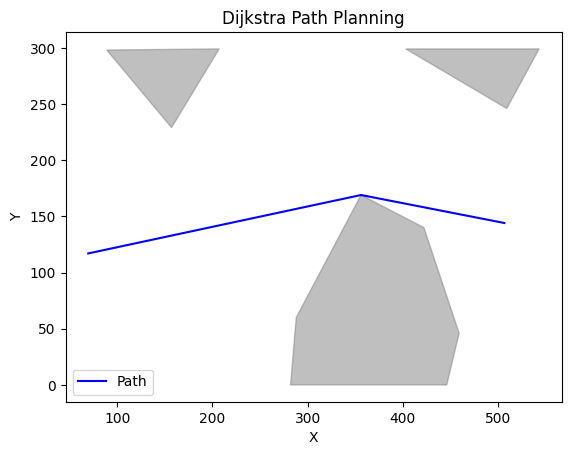

In [ ]:
thymio, goal, obstacles = visio.get_thymio_goal_and_obstacles()
path, _, _ = global_nav.dijkstra(thymio, goal, obstacles)
visio.analysis.path = path
if path:
    #visio.camera_feed.update_image_with_path(path, obstacles)
    global_nav.plot_path(path, obstacles)
else:
    print("No valid path found. Cannot plot.")

In [ ]:
print(path)


Detected 3 markers : [np.int32(4), np.int32(0), np.int32(5)]


NameError: name 'path' is not defined

4 detected corners, 4 corners stored


4 detected corners, 4 corners stored
The highest index where the signal crosses -10 is 77.
Detected markers: [4 5]
[Vision.camerafeed.run()] List of videofeeds must be 5, not 4.Defaulting to show all
Detected markers: [4 0 5]
Detected 3 markers : [np.int32(4), np.int32(0), np.int32(5)]
4 detected corners, 4 corners stored
4 detected corners, 4 corners stored
The highest index where the signal crosses -10 is 77.
Detected markers: [4 5]
[Vision.camerafeed.run()] List of videofeeds must be 5, not 4.Defaulting to show all
Detected markers: [4 0 5]
Detected 3 markers : [np.int32(4), np.int32(0), np.int32(5)]
4 detected corners, 4 corners stored
4 detected corners, 4 corners stored
The highest index where the signal crosses -10 is 52.
Detected markers: [4 5]
[Vision.camerafeed.run()] List of videofeeds must be 5, not 4.Defaulting to show all
Detected markers: [4 0 5]
Detected 3 markers : [np.int32(4), np.int32(0), np.int32(5)]
4 detected corners, 4 corners stored
4 detected corners, 4 corner

In [4]:
#path.pop(0)
#goal_point = path[1]
#print(goal_point)

try:
    while True:
        thymio, goal, obstacles = visio.get_thymio_goal_and_obstacles()
        path, _, _ = global_nav.dijkstra(thymio, goal, obstacles)
        visio.analysis.path = path
        goal_point = path[1]
        #motion_control.obstacle_avoidance()
        #if motion_control.path_tracking(thymio, goal_point):
        #    if not path:
        #        break
        #    else:
        #        goal_point = path[0]
        # thymio, goal, obstacles = visio.get_thymio_goal_and_obstacles()
        time.sleep(0.2)
except KeyboardInterrupt:
    print("Stop the program")
finally:
    visio.stop()
    print("Program finishes")

Detected markers: [4 5]
[Vision.camerafeed.run()] List of videofeeds must be 6, not 5.Defaulting to show all
Detected markers: [4 0 1 5]
Detected 4 markers : [np.int32(4), np.int32(0), np.int32(1), np.int32(5)]
4 detected corners, 4 corners stored
4 detected corners, 4 corners stored
The highest index where the signal crosses -10 is 68.
Detected markers: [4 5]
[Vision.camerafeed.run()] List of videofeeds must be 6, not 5.Defaulting to show all


Detected markers: [4 1 2 5]
Detected 4 markers : [np.int32(4), np.int32(1), np.int32(2), np.int32(5)]
4 detected corners, 4 corners stored
4 detected corners, 4 corners stored
The highest index where the signal crosses -10 is 72.
Detected markers: [4 5]
[Vision.camerafeed.run()] List of videofeeds must be 6, not 5.Defaulting to show all
Detected markers: [4 0 2 5]
Detected 4 markers : [np.int32(4), np.int32(0), np.int32(2), np.int32(5)]
4 detected corners, 4 corners stored
4 detected corners, 4 corners stored
path found
path1 :  [(54.13657760620117, 47.05767822265625), (389.0, 168.0), (505.4999694824219, 144.5)]
In the path pprinting function : 
Finito with the function
The highest index where the signal crosses -10 is 67.
no markers
(get_2_markers) Thymio and Goal markers not detected
Thymio not detected
Goal not detected
[Vision.camerafeed.run()] List of videofeeds must be 6, not 5.Defaulting to show all
Detected markers: [4 0 5]
Detected 3 markers : [np.int32(4), np.int32(0), np.int

ValueError: not enough values to unpack (expected 3, got 0)

: 

In [ ]:
motion_control.set_motor_speed(0, 0)
#test

NameError: name 'motion_control' is not defined

Detected markers: [3 1 2 0]
Detected 4 markers : [np.int32(3), np.int32(1), np.int32(2), np.int32(0)]


4 detected corners, 4 corners stored
4 detected corners, 4 corners stored
no markers
(get_2_markers) Thymio and Goal markers not detected
Thymio not detected
Goal not detected
The highest index where the signal crosses -10 is 59.
[Vision.camerafeed.run()] List of videofeeds must be 5, not 4.Defaulting to show all
Detected markers: [3 1 0]
Detected 3 markers : [np.int32(3), np.int32(1), np.int32(0)]
4 detected corners, 4 corners stored
4 detected corners, 4 corners stored
no markers
(get_2_markers) Thymio and Goal markers not detected
Thymio not detected
Goal not detected
The highest index where the signal crosses -10 is 60.
[Vision.camerafeed.run()] List of videofeeds must be 5, not 4.Defaulting to show all
Detected markers: [3 2 1 0]
Detected 4 markers : [np.int32(3), np.int32(2), np.int32(1), np.int32(0)]
4 detected corners, 4 corners stored
4 detected corners, 4 corners stored
no markers
(get_2_markers) Thymio and Goal markers not detected
Thymio not detected
Goal not detected
The h